In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype # ordinal tanımlama

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
planets = sns.load_dataset("planets")

In [ ]:
df = planets.copy()

In [ ]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [ ]:
df.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [ ]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [ ]:
df.shape

(1035, 6)

In [ ]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [ ]:
# sütun adı değiştirme
df.rename(columns={"method":"ali"})

,ali,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [ ]:
# eksik değer var mı?
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [ ]:
df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [ ]:
# eksik değerleri 0 yaptık
df["orbital_period"].fillna(0, inplace = True)

C:\Users\kariz\AppData\Local\Temp\ipykernel_24452\1688082059.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["orbital_period"].fillna(0, inplace = True)


In [ ]:
# boş verilerin toplamı
df.isnull().sum()

method              0
number              0
orbital_period      0
mass              522
distance          227
year                0
dtype: int64

In [ ]:
# kaç farklı değişken olduğunu öğrendik
kategorik_df = df.select_dtypes(include=[object])
kategorik_df.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [ ]:
# kaç farklı değer var
kategorik_df["method"].value_counts()

method
Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: count, dtype: int64

In [ ]:
# kaç değer var
kategorik_df["method"].value_counts().count()

10

<Axes: ylabel='method'>

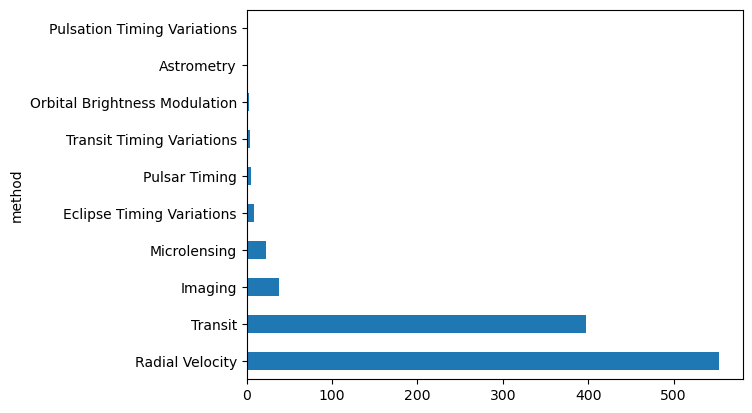

In [ ]:
df["method"].value_counts().plot.barh()

In [ ]:
df_numerik = df.select_dtypes(include=["float64","int64"])

In [ ]:
df_numerik

,number,orbital_period,mass,distance,year
0,1,269.300000,7.10,77.40,2006
1,1,874.774000,2.21,56.95,2008
2,1,763.000000,2.60,19.84,2011
3,1,326.030000,19.40,110.62,2007
4,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...
1030,1,3.941507,NaN,172.00,2006
1031,1,2.615864,NaN,148.00,2007
1032,1,3.191524,NaN,174.00,2007
1033,1,4.125083,NaN,293.00,2008


**---------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [ ]:
diamond = sns.load_dataset("diamonds")

NameError: name 'sns' is not defined

In [ ]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [ ]:
diamond["cut"].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [ ]:
diamond["cut"].value_counts().count()

5

In [ ]:
diamond.cut = diamond.cut.astype(CategoricalDtype(ordered=True))

In [ ]:
diamond.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [ ]:
diamond.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [ ]:
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"]

In [ ]:
diamond.cut = diamond.cut.astype(CategoricalDtype(categories=cut_kategoriler, ordered=True))

In [ ]:
diamond.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

barplot

Text(0.5, 1.0, 'Baslik ekleme')

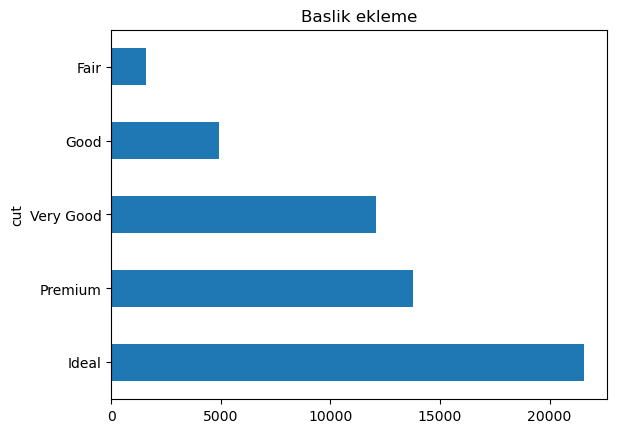

In [ ]:
diamond["cut"].value_counts().plot.barh().set_title("Baslik ekleme")

<Axes: xlabel='cut', ylabel='None'>

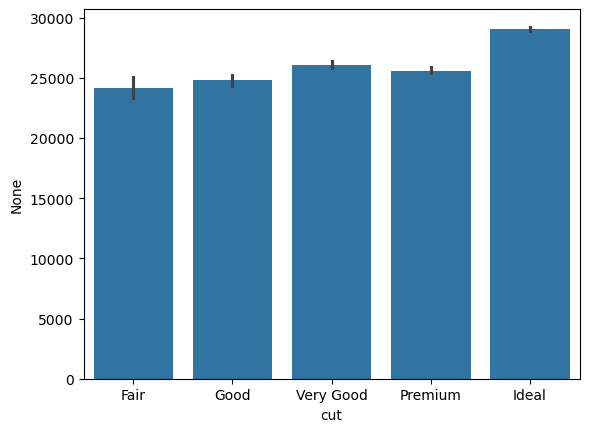

In [ ]:
sns.barplot(x = "cut", y = diamond.cut.index, data=diamond)

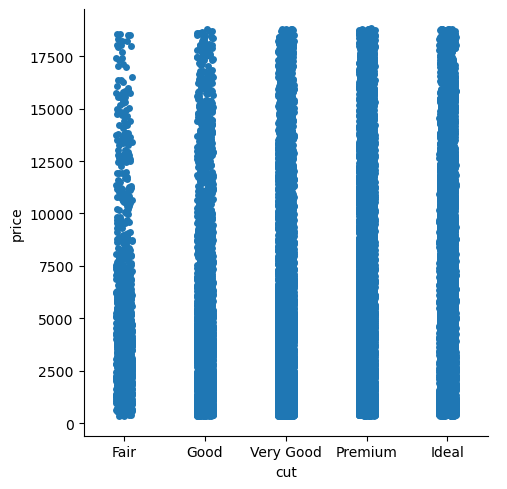

In [ ]:
sns.catplot(x = "cut", y = "price", data=diamond)

<Axes: xlabel='cut', ylabel='price'>

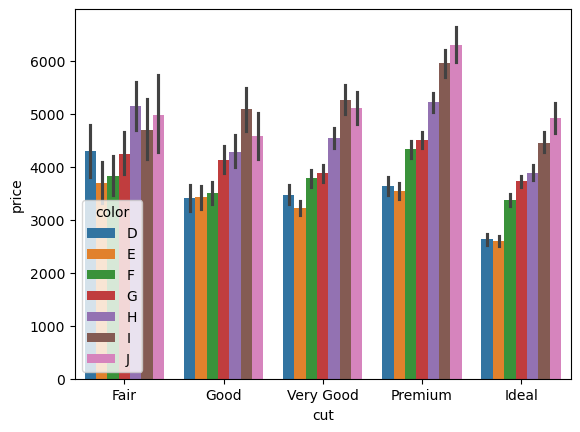

In [ ]:
sns.barplot(x= "cut", y ="price", data = diamond, hue="color")
# çaprazlama

In [ ]:
diamond.groupby(["cut","color"])["price"].mean()

C:\Users\kariz\AppData\Local\Temp\ipykernel_24452\2254370170.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diamond.groupby(["cut","color"])["price"].mean()


cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

histogram ve yoğunluk grafikleri

C:\Users\kariz\AppData\Local\Temp\ipykernel_24452\2571218771.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diamond.price)


<Axes: xlabel='price', ylabel='Density'>

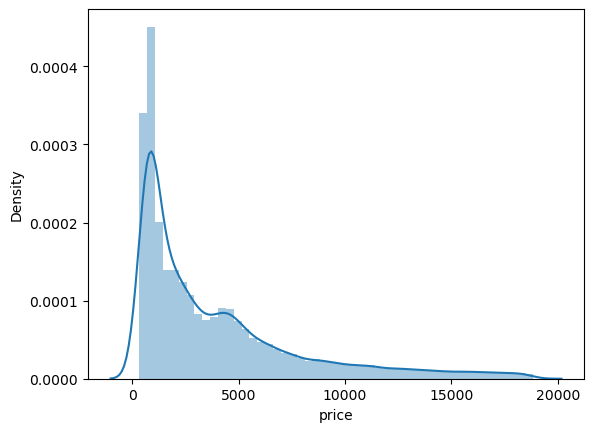

In [ ]:
sns.distplot(diamond.price)

C:\Users\kariz\AppData\Local\Temp\ipykernel_24452\2750272637.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diamond.price, kde = False, bins = 10)


<Axes: xlabel='price'>

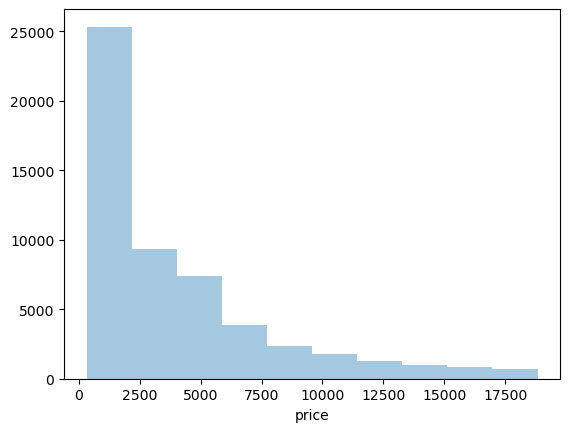

In [ ]:
sns.distplot(diamond.price, kde = False, bins = 10)

C:\Users\kariz\AppData\Local\Temp\ipykernel_24452\4189784924.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(diamond.price, shade = True)


<Axes: xlabel='price', ylabel='Density'>

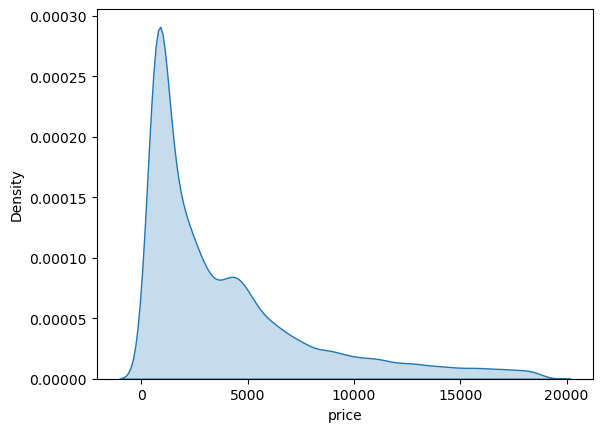

In [ ]:
sns.kdeplot(diamond.price, shade = True)

In [ ]:
?sns.distplot

Signature:
sns.distplot(
    a=None,
    bins=None,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None,
    x=None,
)
Docstring:
DEPRECATED

This function has been deprecated and will be removed in seaborn v0.14.0.
It has been replaced by :func:`histplot` and :func:`displot`, two functions
with a modern API and many more capabilities.

For a guide to updating, please see this notebook:

https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751
File:      c:\users\kariz\anaconda3\lib\site-packages\seaborn\distributions.py
Type:      function

histogram ve yoğunluk çaprazlamalar

<Axes: xlabel='price', ylabel='Density'>

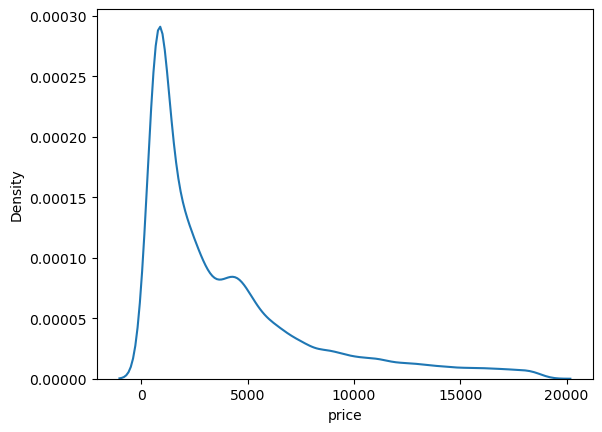

In [ ]:
sns.kdeplot(diamond.price) 

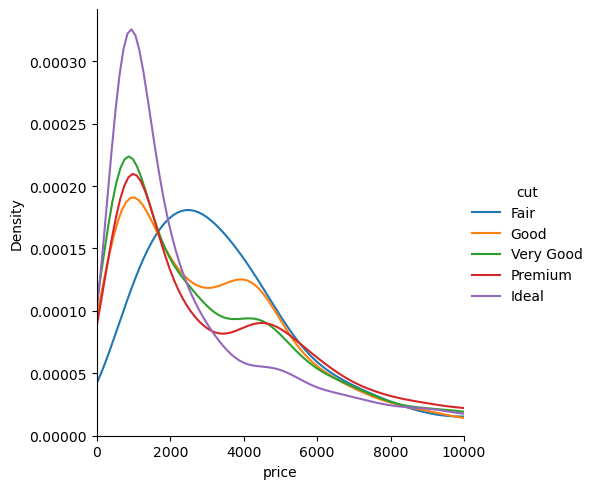

In [ ]:
(sns
 .FacetGrid(diamond,
                hue = "cut",
                height=5,
                xlim=(0,10000))
.map(sns.kdeplot, "price")
.add_legend()
)

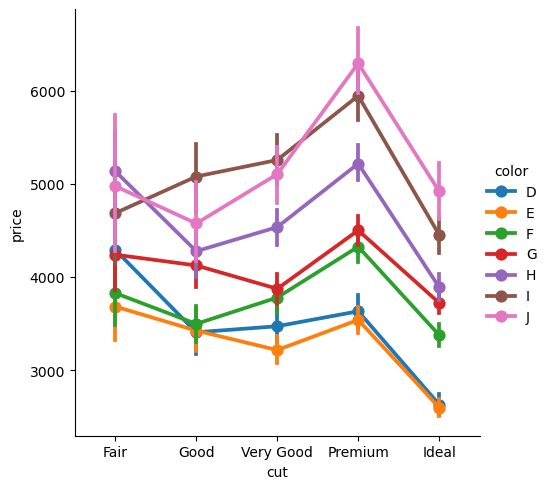

In [ ]:
sns.catplot(data=diamond, x = "cut", y = "price", hue="color", kind="point")

**---------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [ ]:
tips = sns.load_dataset("tips")

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
